## Using pandas rolling function

### 1. Set up environment

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### 2. Get data from yahoo.finance

In [2]:
#gld = pdr.get_data_yahoo('ntes', '2019-03-18')
#gld.head()

In [3]:
start = datetime(2018, 3, 12)
end = datetime(2019, 3, 19)
gld = web.DataReader('NTES', 'iex', start, end)
gld.head()

,open,high,low,close,volume
date,,,,,
2018-03-12,310.1037,315.2630,309.5183,311.8301,813642
2018-03-13,312.0782,314.8166,303.6248,309.1810,908338
2018-03-14,311.8698,315.6897,309.7664,311.7111,930314
2018-03-15,315.3920,326.4250,314.5139,323.0317,1527068
2018-03-16,321.6129,325.8198,320.5910,324.3811,1714714


### 3. Discard unneeded data  

In [4]:
gld_close = pd.DataFrame(gld.close)

### 4. Use rolling method to compute moving averages

In [5]:
gld_close['MA_9'] = gld_close.close.rolling(9).mean().shift()
gld_close['MA_21'] = gld_close.close.rolling(21).mean()

In [6]:
gld_close['MA_9'].head(12)

date
2018-03-12           NaN
2018-03-13           NaN
2018-03-14           NaN
2018-03-15           NaN
2018-03-16           NaN
2018-03-19           NaN
2018-03-20           NaN
2018-03-21           NaN
2018-03-22           NaN
2018-03-23    313.905956
2018-03-26    311.852156
2018-03-27    310.282322
Name: MA_9, dtype: float64

### 5. Plot data and moving averages

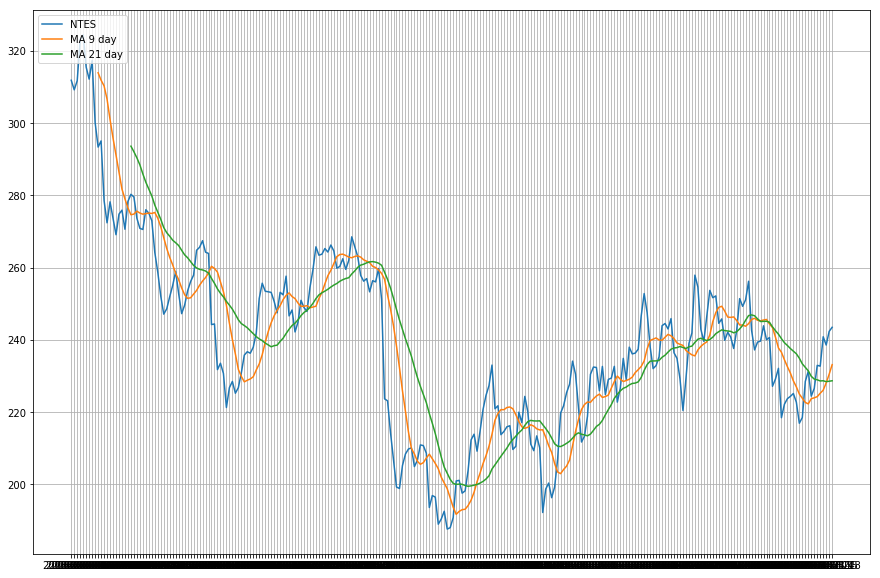

In [9]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close['close'],label='NTES')
plt.plot(gld_close['MA_9'], label='MA 9 day')
plt.plot(gld_close['MA_21'], label='MA 21 day')
plt.legend(loc=2)

### 6. Compute log change (instantaneous rate of return)

In [8]:
gld_close["change"] = np.log(gld_close["Close"] / gld_close["Close"].shift())

KeyError: 'Close'

### 7. Plot reveals noisy data centered around 0

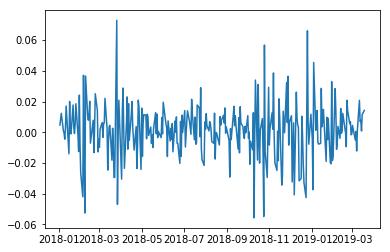

In [20]:
plt.plot(gld_close.change)

### 8. Compute rolling historical volatility, offset using .shift() method 

In [21]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()

ImportError: matplotlib is required for plotting.

### Part 2 some price analysis

In [22]:
#offset expected change 1-day
gld_close['exp_chng'] = gld_close['Volatility'] * gld_close['Close'].shift()
gld_close['actual_chng'] = gld_close['Close'] - gld_close['Close'].shift()


In [23]:
#running more than once will 
gld_close = pd.DataFrame(gld_close.iloc[22:])

In [24]:
gld_close['Magnitude'] = gld_close['actual_chng'] / gld_close['exp_chng'] 

In [25]:
gld_close['abs_magni'] = np.abs(gld_close['Magnitude'])
gld_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,,,
2018-02-02,91.779999,93.072222,90.729524,-0.026663,0.010676,1.006295,-2.480003,-2.464490,2.464490
2018-02-05,88.000000,93.091111,90.771905,-0.042058,0.012644,1.160438,-3.779999,-3.257391,3.257391
2018-02-06,91.330002,92.657778,90.921428,0.037143,0.015908,1.399932,3.330002,2.378688,2.378688
2018-02-07,89.610001,92.603333,90.984762,-0.019012,0.017658,1.612675,-1.720001,-1.066552,1.066552
2018-02-08,85.010002,92.301111,90.831905,-0.052698,0.018226,1.633256,-4.599998,-2.816459,2.816459


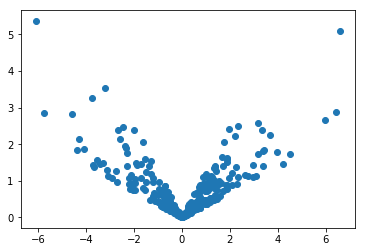

In [26]:
plt.scatter(gld_close['actual_chng'], gld_close['abs_magni'])